In [1]:
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 24 not upgraded.
Need to get 9,599 kB of archives.
After this operation, 29.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 fonts-nanum all 20180306-3 [9,599 kB]
Fetched 9,599 kB in 1s (8,523 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 122518 files and di

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd /content/drive/MyDrive/프로젝트 폴더/code/Sales_model/Data

/content/drive/.shortcut-targets-by-id/1fmVXXO9WkxfQqimV76GhZhDAdNd3hhtJ/프로젝트 폴더/code/Sales_model/Data


In [3]:
%ls

data_out.csv  model_reg.pkl  매출비교.csv  회귀_예상매출.csv
merged.csv    result.csv     예상매출.csv


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'NanumBarunGothic' # 나눔바른고딕 적용하기
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')

In [23]:
data = pd.read_csv('data_out.csv')            
data.drop(columns = ['Unnamed: 0','상권코드'], inplace=True)
# 분기당 매출을 월매출로 생각하자!(1분기 : 3개월, 유사업종수로 나눔 까지 고려)

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83674 entries, 0 to 83673
Data columns (total 37 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   서비스업종코드명          83674 non-null  object 
 1   점포수               83674 non-null  float64
 2   유사업종점포수           83674 non-null  float64
 3   개업점포수             83674 non-null  float64
 4   폐업점포수             83674 non-null  float64
 5   집객시설수             83674 non-null  float64
 6   관공서수              83674 non-null  float64
 7   은행수               83674 non-null  float64
 8   버스정거장수            83674 non-null  float64
 9   지하철수              83674 non-null  float64
 10  약국수               83674 non-null  float64
 11  총직장인구수            83674 non-null  float64
 12  총상주인구수            83674 non-null  float64
 13  총_생활인구_수          83674 non-null  float64
 14  남성_생활인구_수         83674 non-null  float64
 15  여성_생활인구_수         83674 non-null  float64
 16  연령대_10_생활인구_수     83674 non-null  float6

In [25]:
data.describe()

,점포수,유사업종점포수,개업점포수,폐업점포수,집객시설수,관공서수,은행수,버스정거장수,지하철수,약국수,...,시간대_5_생활인구_수,시간대_6_생활인구_수,월요일_생활인구_수,화요일_생활인구_수,수요일_생활인구_수,목요일_생활인구_수,금요일_생활인구_수,토요일_생활인구_수,일요일_생활인구_수,분기당매출금액
count,83674.000000,83674.000000,83674.000000,83674.000000,83674.000000,83674.000000,83674.000000,83674.00000,83674.000000,83674.000000,...,83674.000000,83674.000000,83674.000000,83674.000000,83674.000000,83674.000000,83674.000000,83674.000000,83674.000000,8.367400e+04
mean,6.320799,8.005802,0.300727,0.303619,40.275450,1.102111,0.660098,6.04012,0.412577,4.254237,...,159589.409966,110559.736585,131036.062481,131815.679021,131959.332182,131911.779298,131554.435237,126129.202751,123534.455428,8.480251e+06
std,4.871310,5.763037,0.458577,0.459823,54.900189,1.623442,0.706120,6.94112,0.759508,5.440535,...,91075.128345,65533.003383,75524.226698,76110.552119,76150.086224,76132.810906,75796.952440,72665.796272,71950.783721,4.966158e+06
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,1274.000000,299.000000,967.000000,962.000000,1000.000000,990.000000,996.000000,1062.000000,838.000000,1.000000e+06
25%,2.000000,3.000000,0.000000,0.000000,11.000000,0.000000,0.000000,2.00000,0.000000,1.000000,...,78445.000000,51996.000000,64548.000000,64868.500000,64899.000000,64889.000000,64734.000000,61561.500000,59244.000000,3.960000e+06
50%,5.000000,6.000000,0.000000,0.000000,21.000000,1.000000,1.000000,4.00000,0.000000,2.000000,...,154449.000000,105573.000000,124140.500000,124652.500000,124833.000000,124611.000000,124278.000000,120864.000000,118159.500000,7.670000e+06
75%,12.000000,15.000000,1.000000,1.000000,48.000000,2.000000,1.000000,8.00000,1.000000,6.000000,...,264638.000000,183472.000000,218730.000000,220330.000000,220166.000000,220275.000000,219695.000000,208544.000000,204956.000000,1.416000e+07
max,13.500000,16.500000,1.000000,1.000000,593.000000,21.000000,2.000000,83.00000,5.000000,52.000000,...,276702.750000,196528.500000,228747.750000,230508.375000,230712.000000,230684.250000,229579.500000,220041.000000,217321.125000,1.530000e+07


In [26]:
# # 단위 십만원으로
# data['분기당매출금액'] *= 100000

In [29]:
# 분류 모델
def label_encode_by_interval(df, column, intervals):
    """
    Perform label encoding by interval on a given column in a Pandas DataFrame.

    Parameters:
    - df: the DataFrame to perform label encoding on
    - column: the name of the column to encode
    - intervals: a list of tuples defining the intervals to use for encoding. Each tuple should contain
      two elements: the lower bound and upper bound of the interval (inclusive), in that order.

    Returns:
    - A copy of the original DataFrame with the specified column label-encoded using the given intervals.
    """
    # Make a copy of the input dataframe to avoid modifying it
    encoded_df = df.copy()

    # Define a dictionary to map intervals to labels
    interval_map = {}
    for i, interval in enumerate(intervals):
        interval_mask = (encoded_df[column] >= interval[0]) & (encoded_df[column] <= interval[1])
        encoded_df.loc[interval_mask, column] = i

    return encoded_df

# Define the intervals to use for encoding column '분기당매출금액'
intervals = [(1e6, 2.5e6), (2.5e6, 4e6), (4e6, 5.5e6), (5.5e6, 7.5e6), (7.5e6, 9.5e6), (9.5e6, 1.2e7), (1.2e7, 1.561e7), (1.561e7, 1.6e7)]



# Apply the label encoding function to column '분기당매출금액'
encoded_df = label_encode_by_interval(data, '분기당매출금액', intervals)

data = encoded_df


In [30]:
print(len(encoded_df[encoded_df['분기당매출금액']==0])) 
print(len(encoded_df[encoded_df['분기당매출금액']==1]))
print(len(encoded_df[encoded_df['분기당매출금액']==2]))
print(len(encoded_df[encoded_df['분기당매출금액']==3]))
print(len(encoded_df[encoded_df['분기당매출금액']==4]))
print(len(encoded_df[encoded_df['분기당매출금액']==5]))
print(len(encoded_df[encoded_df['분기당매출금액']==6]))
print(len(encoded_df[encoded_df['분기당매출금액']==7]))

10556
10706
9231
10600
8397
8049
6881
19254


# 원핫 인코딩 시킨 데이터

In [31]:
# 자치구코드, 업종코드 원핫 인코딩
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(sparse=False)

train_cat = ohe.fit_transform(data[['시군구명','서비스업종코드명']])

data = pd.concat([data.drop(columns=['시군구명','서비스업종코드명']),
           pd.DataFrame(train_cat, columns=[col for col in np.append(ohe.categories_[0],ohe.categories_[1])])], axis=1)

In [32]:
data.columns

Index(['점포수', '유사업종점포수', '개업점포수', '폐업점포수', '집객시설수', '관공서수', '은행수', '버스정거장수',
       '지하철수', '약국수', '총직장인구수', '총상주인구수', '총_생활인구_수', '남성_생활인구_수', '여성_생활인구_수',
       '연령대_10_생활인구_수', '연령대_20_생활인구_수', '연령대_30_생활인구_수', '연령대_40_생활인구_수',
       '연령대_50_생활인구_수', '연령대_60_이상_생활인구_수', '시간대_1_생활인구_수', '시간대_2_생활인구_수',
       '시간대_3_생활인구_수', '시간대_4_생활인구_수', '시간대_5_생활인구_수', '시간대_6_생활인구_수',
       '월요일_생활인구_수', '화요일_생활인구_수', '수요일_생활인구_수', '목요일_생활인구_수', '금요일_생활인구_수',
       '토요일_생활인구_수', '일요일_생활인구_수', '분기당매출금액', '강남구', '강동구', '강북구', '강서구',
       '관악구', '광진구', '구로구', '금천구', '노원구', '도봉구', '동대문구', '동작구', '마포구', '서대문구',
       '서초구', '성동구', '성북구', '송파구', '양천구', '영등포구', '용산구', '은평구', '종로구', '중구',
       '중랑구', '분식전문점', '양식음식점', '육류판매', '일식음식점', '제과점', '중식음식점', '치킨전문점',
       '커피-음료', '패스트푸드점', '한식음식점', '호프-간이주점'],
      dtype='object')

# train test split

In [33]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.model_selection import *
import lightgbm as lgb
from sklearn import metrics


In [34]:
# data = data.astype({'분기당매출금액': 'int'})
data = data.astype({'분기당매출금액': 'string'})

train = data[data.columns.difference(['분기당매출금액'])]
target = data[['분기당매출금액']]

x_train, x_test, y_train, y_test = train_test_split(train, target, test_size=0.2, shuffle=True, random_state=2023)

## lightGBM Classifier

In [35]:
model = lgb.LGBMClassifier(num_iterations = 3000, 
                           learning_rate=0.05, 
                           max_depth = -1,
                           num_leaves = 200, 
                           min_child_samples = 100,
                           min_sum_hessian_in_leaf=1e-2,
                           feature_fraction = 0.9,
                           reg_lambda =  0.01, #L2 regularization
                           objective = 'multi-class',
                           num_class = 8)

In [ ]:
model.fit(x_train, y_train)

[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=0.01, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=0.01


LGBMClassifier(feature_fraction=0.9, learning_rate=0.05, min_child_samples=100,
               min_sum_hessian_in_leaf=0.01, num_class=8, num_iterations=3000,
               num_leaves=200, objective='multi-class', reg_lambda=0.01)

In [ ]:
predicted_y = model.predict(x_test)

In [ ]:
print(metrics.classification_report(y_test, predicted_y))
print(metrics.confusion_matrix(y_test, predicted_y))

              precision    recall  f1-score   support

         0.0       0.56      0.58      0.57      2135
         1.0       0.38      0.40      0.39      2137
         2.0       0.32      0.31      0.31      1872
         3.0       0.34      0.35      0.34      2145
         4.0       0.27      0.26      0.26      1647
         5.0       0.32      0.27      0.29      1594
         6.0       0.32      0.24      0.28      1364
         7.0       0.67      0.77      0.72      3841

    accuracy                           0.45     16735
   macro avg       0.40      0.40      0.40     16735
weighted avg       0.44      0.45      0.44     16735

[[1246  448  162  110   54   25   16   74]
 [ 464  847  358  219   99   46   24   80]
 [ 159  410  577  403  122   71   36   94]
 [ 119  226  339  750  321  138   71  181]
 [  81  107  135  342  423  251   92  216]
 [  53   76   96  172  289  424  195  289]
 [  26   44   60   92  105  215  330  492]
 [  64   52   87  141  139  154  256 2948]]


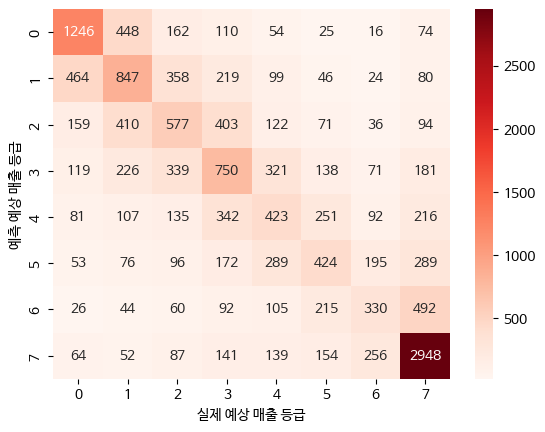

In [ ]:
sns.heatmap(metrics.confusion_matrix(y_test, predicted_y), annot = True, fmt = 'd',cmap = 'Reds')
plt.xlabel('실제 예상 매출 등급')
plt.ylabel('예측 예상 매출 등급')
plt.show()

In [ ]:
model.score(x_test,y_test)

0.45085150881386316

<Axes: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

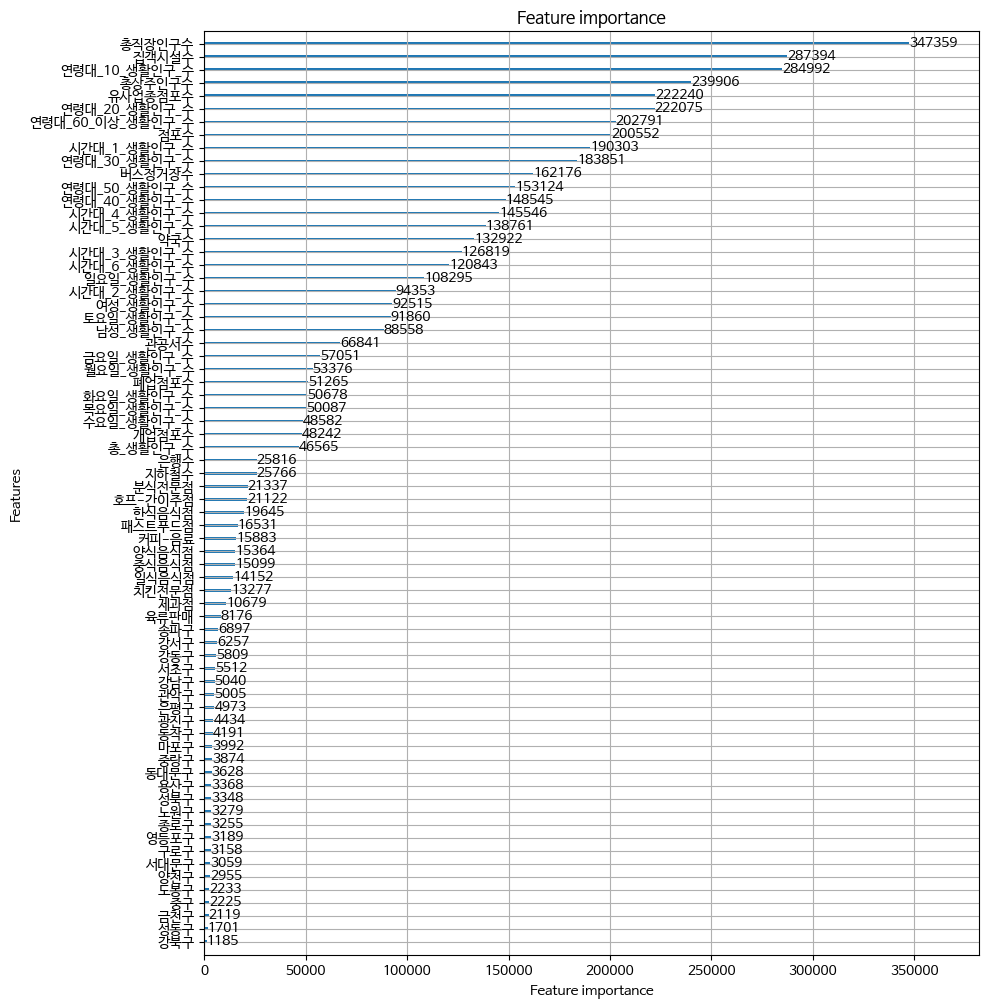

In [ ]:
fig, ax = plt.subplots(figsize = (10,12))
lgb.plot_importance(model,ax=ax)

In [ ]:
final_result = pd.concat([y_test.reset_index(drop=True), pd.DataFrame(predicted_y)], axis = 1)

In [ ]:
final_result

,분기당매출금액,0
0,4.0,1.0
1,0.0,7.0
2,3.0,4.0
3,2.0,2.0
4,7.0,4.0
...,...,...
16730,5.0,3.0
16731,0.0,0.0
16732,4.0,3.0
16733,4.0,5.0


In [ ]:
import pickle
file = 'model_r.pkl'
pickle.dump(model, open(file, 'wb'))
print('Trained LGB model was saved!')

Trained LGB model was saved!


# 실제 테스트

In [ ]:
test_pd = data.loc[data['강남구']==1]

In [ ]:
inverse = ohe.inverse_transform(test_pd.iloc[:,35:71])

In [ ]:
a = model.predict(test_pd.drop(columns='분기당매출금액'))

In [ ]:
test_pd.drop(columns=test_pd.iloc[:,35:71].columns.tolist(),inplace=True)

In [ ]:
test_pd['시군구명'] = inverse[:,0]
test_pd['서비스업종명'] = inverse[:,1]
test_pd['월예상매출'] = a

In [ ]:
test_pd.columns

Index(['점포수', '유사업종점포수', '개업점포수', '폐업점포수', '집객시설수', '관공서수', '은행수', '버스정거장수',
       '지하철수', '약국수', '총직장인구수', '총상주인구수', '총_생활인구_수', '남성_생활인구_수', '여성_생활인구_수',
       '연령대_10_생활인구_수', '연령대_20_생활인구_수', '연령대_30_생활인구_수', '연령대_40_생활인구_수',
       '연령대_50_생활인구_수', '연령대_60_이상_생활인구_수', '시간대_1_생활인구_수', '시간대_2_생활인구_수',
       '시간대_3_생활인구_수', '시간대_4_생활인구_수', '시간대_5_생활인구_수', '시간대_6_생활인구_수',
       '월요일_생활인구_수', '화요일_생활인구_수', '수요일_생활인구_수', '목요일_생활인구_수', '금요일_생활인구_수',
       '토요일_생활인구_수', '일요일_생활인구_수', '분기당매출금액', '시군구명', '서비스업종명', '월예상매출'],
      dtype='object')

In [ ]:
test_pd.to_csv('강남구예상매출.csv', encoding='utf-8-sig')